In [34]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# Cargar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(train_x_orig, train_y), (test_x_orig, test_y)  = mnist.load_data()

train_y = np.where(train_y == 4, 1, 0)
test_y = np.where(test_y == 4, 1, 0)

In [50]:
# Procesar el conjunto de datos
train_set_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_set_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Se normalizan las imágenes
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [51]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE

    s = (1 / (1 + np.exp(-z)))

    # YOUR CODE ENDS HERE

    return s

In [52]:
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b = float(0)
    # YOUR CODE ENDS HERE

    return w, b

In [53]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication.
    # And don't use loops for the sum.
    # cost = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X)+b)                                                    # compute activation
    cost = -(Y * np.log(A) + (1-Y)*np.log(1-A)).sum()                               # compute cost
    cost = cost/m
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = np.dot(X,(A-Y).T)
    dw = dw/m
    db = np.sum(A-Y)
    db = db/m
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [54]:
# GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        # YOUR CODE ENDS HERE

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w-learning_rate*dw
        b = b-learning_rate*db
        # YOUR CODE ENDS HERE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [55]:
# GRADED FUNCTION: predict
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X)+b)
    # YOUR CODE ENDS HERE

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] =
        # else:
        #     Y_prediction[0,i] =
        # YOUR CODE STARTS HERE
        if A[0][i]<0.5:
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
        # YOUR CODE ENDS HERE

    return Y_prediction

In [56]:
# GRADED FUNCTION: predict
def predict_proba(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X)+b)
    # YOUR CODE ENDS HERE

    return A

In [57]:
def get_threshold_and_roc(Y_pred,Y):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''


    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    # YOUR CODE ENDS HERE

    fpr,tpr,thresholds = roc_curve(Y.flatten(),Y_pred.flatten())
    auc = roc_auc_score(Y.flatten(),Y_pred.flatten())
    plt.plot(range(len(tpr)),(tpr-fpr))
    return thresholds[(tpr-fpr).argmax()], auc

In [62]:
# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations=1500, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    num_px = np.shape(X_train)[0]
    dim = num_px
    w,b = initialize_with_zeros(dim)


    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train,
                                        num_iterations= num_iterations,
                                        learning_rate = learning_rate, print_cost = False)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict_proba(w, b, X_test)
    Y_prediction_train = predict_proba(w, b, X_train)

    thresh, auc = get_threshold_and_roc(Y_prediction_train,Y_train)
    print('Thresh', thresh)
    print('AUC', auc)

    Y_prediction_train = (Y_prediction_train>=thresh).astype(int)
    Y_prediction_test = (Y_prediction_test>=thresh).astype(int)

    # Predict test/train set examples (≈ 2 lines of code)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Thresh 0.17346066557926454
AUC 0.9876111945219586
train accuracy: 95.27333333333334 %
test accuracy: 95.07 %


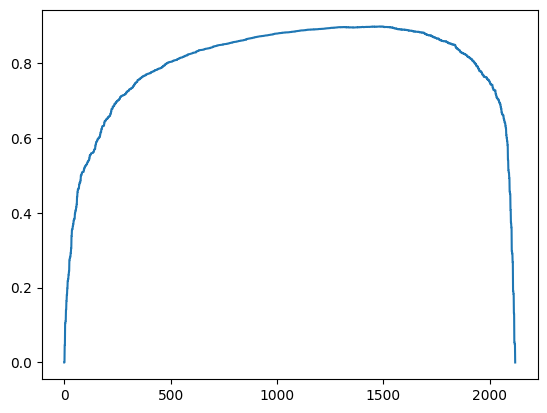

In [66]:
logistic_regression_model = model(train_set_x, train_y, test_set_x, test_y, num_iterations=1200, learning_rate=0.050, print_cost=True)

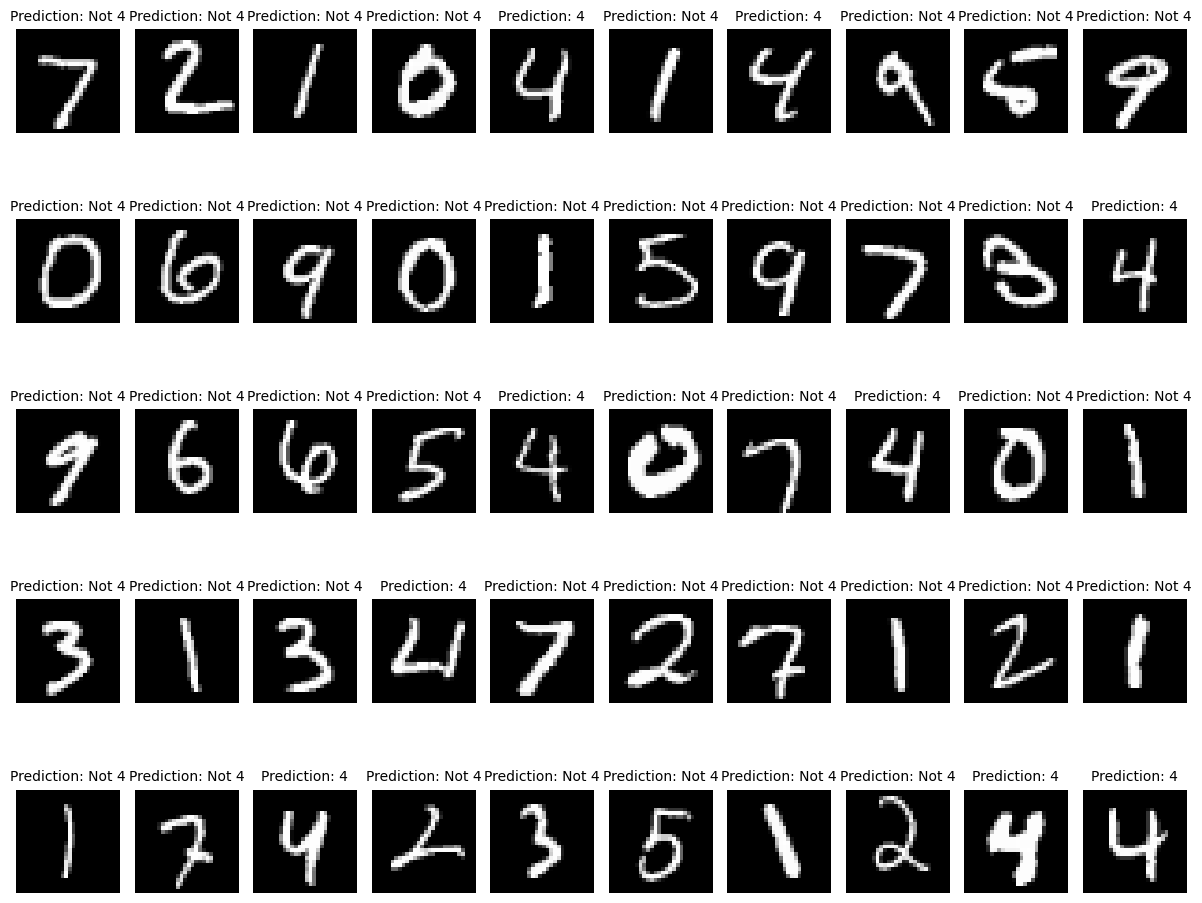

In [78]:
def plot_images_with_predictions(images, predictions, num_images=10):
    num_rows = (num_images + 9) // 10  # Calcular el número de filas (hasta 10 imágenes por fila)
    plt.figure(figsize=(12, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 10, i + 1)
        plt.imshow(images[i], cmap='gray')
        # Si el modelo dice que tiene más de 50% de probabilidades entonces se indica como 4.
        plt.title("Prediction: " + ("4" if predictions[i] > 0.5 else "Not 4"), fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Número de predicciones
num_preds = 50
predictions_test = logistic_regression_model['Y_prediction_test'][0][:num_preds]

# Plotear las primeras 50 imágenes
plot_images_with_predictions(test_x_orig, predictions_test, num_images=num_preds)